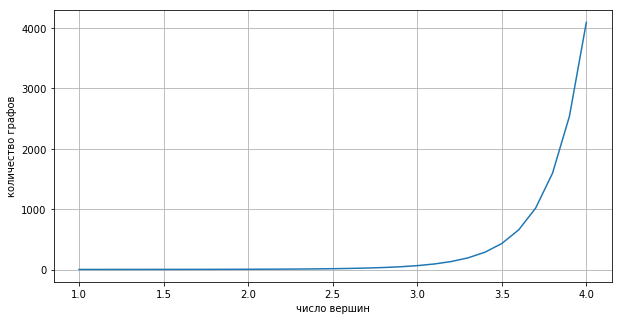

In [1]:
def graph_count(N):
    return 2 ** (N * (N-1))

import matplotlib.pyplot as plt

points = [x / 10 for x in range(10, 41)]
plt.figure(figsize=(10,5))
plt.plot(points, [graph_count(x) for x in points])
plt.grid(True)
plt.xlabel('число вершин')
plt.ylabel('количество графов')
plt.show()

In [2]:
# двудольный граф как модель семантической похожести текстов
queries = ["цвет", "фильм", "вкус", "книга"]
docs = ["синяя борода", "бордо", "багровые реки", 
        "белый бим чёрное ухо", "шоколад", "сладкий ноябрь", "гарри поттер"]
# клики пользователей
clicks = set([
    ("цвет", "синяя борода"),
    ("цвет", "багровые реки"),
    ("цвет", "белый бим чёрное ухо"),
    ("цвет", "бордо"),
    ("фильм", "багровые реки"),
    ("фильм", "белый бим чёрное ухо"),
    ("фильм", "шоколад"),
    ("фильм", "сладкий ноябрь"),
    ("фильм", "гарри поттер"),
    ("вкус", "шоколад"),
    ("вкус", "сладкий ноябрь"),
    ("вкус", "бордо"),
    ("книга", "синяя борода"),
    ("книга", "белый бим чёрное ухо"),
    ("книга", "гарри поттер")
])

reversed_clicks = set([(b, a) for (a, b) in clicks])

result = dict()
for a in docs:
    for b in queries:
        for c in docs:
            if a != c and (a, b) in reversed_clicks and (b, c) in clicks:
                if a not in result: result[a] = set()
                result[a].add(c)
for key in result:
    print(key, ">")
    print("\t", *result[key], sep="; ")

синяя борода >
	; белый бим чёрное ухо; гарри поттер; багровые реки; бордо
бордо >
	; синяя борода; багровые реки; белый бим чёрное ухо; шоколад; сладкий ноябрь
багровые реки >
	; синяя борода; гарри поттер; бордо; белый бим чёрное ухо; шоколад; сладкий ноябрь
белый бим чёрное ухо >
	; багровые реки; гарри поттер; бордо; синяя борода; шоколад; сладкий ноябрь
шоколад >
	; багровые реки; гарри поттер; бордо; белый бим чёрное ухо; сладкий ноябрь
сладкий ноябрь >
	; багровые реки; гарри поттер; бордо; белый бим чёрное ухо; шоколад
гарри поттер >
	; багровые реки; белый бим чёрное ухо; синяя борода; шоколад; сладкий ноябрь
